# Week 5

# CS663 Artificial Intelligence Laboratory Report
(Nihar Patel, Mann Mehta, Smit Patel)

{20251603011, 20251602012, 20251602018}@iiitvadodara.ac.in

## Data Collection & Preprocessing

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd

TICKER = "^N225"

PERIOD = "max"

def fetch_nikkei_data(ticker, period):
    try:
        data = yf.download(ticker, period=period)

        if data.empty:
            print(f"Error: No data returned for ticker {ticker}. Check the ticker symbol.")
            return None

        print("\nSuccessfully fetched data.")
        return data

    except Exception as e:
        print(f"An error occurred during data download: {e}")
        print("Please ensure you have the 'yfinance' and 'pandas' libraries installed (pip install yfinance pandas).")
        return None

# Execute the function
nikkei_data = fetch_nikkei_data(TICKER, PERIOD)

if nikkei_data is not None:
    print("\n--- First 5 rows of the data: ---")
    print(nikkei_data.head())

    print("\n--- Summary Statistics: ---")
    print(nikkei_data['Close'].describe())

    # Save the data to a CSV file
    FILE_NAME = 'nikkei_225_data.csv'
    nikkei_data.to_csv(FILE_NAME)
    print(f"\nData successfully saved to '{FILE_NAME}'.")

/tmp/ipython-input-815346128.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed


Successfully fetched data.

--- First 5 rows of the data: ---
Price             Close         High          Low         Open Volume
Ticker            ^N225        ^N225        ^N225        ^N225  ^N225
Date                                                                 
1965-01-05  1257.719971  1257.719971  1257.719971  1257.719971      0
1965-01-06  1263.989990  1263.989990  1263.989990  1263.989990      0
1965-01-07  1274.270020  1274.270020  1274.270020  1274.270020      0
1965-01-08  1286.430054  1286.430054  1286.430054  1286.430054      0
1965-01-12  1288.540039  1288.540039  1288.540039  1288.540039      0

--- Summary Statistics: ---
Ticker         ^N225
count   14970.000000
mean    14351.414296
std      9536.859539
min      1020.489990
25%      6763.219849
50%     13189.910156
75%     20137.290527
max     52411.339844

Data successfully saved to 'nikkei_225_data.csv'.


In [ ]:
df = pd.read_csv("/content/nikkei_225_data.csv")

df

,Price,Close,High,Low,Open,Volume
0,Ticker,^N225,^N225,^N225,^N225,^N225
1,Date,NaN,NaN,NaN,NaN,NaN
2,1965-01-05,1257.719970703125,1257.719970703125,1257.719970703125,1257.719970703125,0
3,1965-01-06,1263.989990234375,1263.989990234375,1263.989990234375,1263.989990234375,0
4,1965-01-07,1274.27001953125,1274.27001953125,1274.27001953125,1274.27001953125,0
...,...,...,...,...,...,...
14967,2025-11-17,50323.91015625,50398.16015625,49845.859375,50282.390625,126000000
14968,2025-11-18,48702.98046875,49971.55078125,48661.51953125,49812.94921875,137400000
14969,2025-11-19,48537.69921875,49087.109375,48235.30078125,48822.87890625,136500000
14970,2025-11-20,49823.94140625,50574.8203125,49113.390625,49129.2890625,139400000


## Preprocessing

In [ ]:
import pandas as pd
import numpy as np

# 1. Load the dataset robustly
# based on your screenshot:
# Row 0 = Price header group
# Row 1 = Ticker info
# Row 2 = 'Date' header artifact
# Row 3 = Actual Data starts here
file_path = 'nikkei_225_data.csv'

# We read without a header and skip the first 3 rows of metadata
df = pd.read_csv(file_path, header=None, skiprows=3)

# 2. Assign standard column names manually
# The screenshot shows an index column (0,1,2..) at the start, so we account for that.
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# 3. Standard Preprocessing
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Force numeric conversion (just in case any strings remain)
cols_to_numeric = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle Missing Values
df.ffill(inplace=True) # Forward fill
df.dropna(inplace=True) # Drop any remaining NaNs

# 4. Calculate Returns (The Input for your Models)
# Simple Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Log Returns (Often better for HMMs as they are time-additive and normally distributed)
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Drop the first row (NaN due to return calculation)
df.dropna(inplace=True)

# Verification
print("--- Data Shape ---")
print(df.shape)
print("\n--- First 5 Rows ---")
print(df[['Close', 'Daily_Return', 'Log_Return']].head())

--- Data Shape ---
(14969, 7)

--- First 5 Rows ---
                  Close  Daily_Return  Log_Return
Date                                             
1965-01-06  1263.989990      0.004985    0.004973
1965-01-07  1274.270020      0.008133    0.008100
1965-01-08  1286.430054      0.009543    0.009498
1965-01-12  1288.540039      0.001640    0.001639
1965-01-13  1281.670044     -0.005332   -0.005346


In [ ]:
df

,Close,High,Low,Open,Volume,Daily_Return,Log_Return
Date,,,,,,,
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,0,0.004985,0.004973
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,0,0.008133,0.008100
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,0,0.009543,0.009498
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,0,0.001640,0.001639
1965-01-13,1281.670044,1281.670044,1281.670044,1281.670044,0,-0.005332,-0.005346
...,...,...,...,...,...,...,...
2025-11-17,50323.910156,50398.160156,49845.859375,50282.390625,126000000,-0.001045,-0.001045
2025-11-18,48702.980469,49971.550781,48661.519531,49812.949219,137400000,-0.032210,-0.032740
2025-11-19,48537.699219,49087.109375,48235.300781,48822.878906,136500000,-0.003394,-0.003399


## Fitting the Model

In [ ]:
# ==========================================
# Gaussian HMM on existing df (no re-import)
# ==========================================

!pip install hmmlearn --quiet

import numpy as np
from hmmlearn.hmm import GaussianHMM

# ------------------------------------------
# 1. Choose which return series to use
# ------------------------------------------
if "Log_Return" in df.columns:
    feature_col = "Log_Return"
elif "Daily_Return" in df.columns:
    feature_col = "Daily_Return"
else:
    raise ValueError("df must contain either 'Log_Return' or 'Daily_Return'.")

print(f"Using feature column for HMM: {feature_col}")

# ------------------------------------------
# 2. Prepare observation matrix X (T x 1)
#    Keep index so we can map states back
# ------------------------------------------
returns = df[[feature_col]].copy()

# Clean only this column (just in case)
returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True)

X = returns.values   # shape (T, 1)
T, d = X.shape
print(f"Number of observations used for HMM: {T}")

# ------------------------------------------
# 3. Fit Gaussian HMM and select #states via BIC
# ------------------------------------------
states_candidates = range(2, 6)  # try 2,3,4,5 states
best_model = None
best_num_states = None
lowest_bic = np.inf

for n_states in states_candidates:
    model = GaussianHMM(
        n_components=n_states,
        covariance_type="full",
        n_iter=1000,
        random_state=42
    )

    model.fit(X)
    logL = model.score(X)

    # Number of free parameters in GaussianHMM
    n_params = (
        (n_states - 1) +                    # startprob
        n_states * (n_states - 1) +         # transmat
        n_states * d +                      # means
        n_states * d * (d + 1) / 2          # covariances (full)
    )

    bic = -2 * logL + n_params * np.log(T)
    print(f"States: {n_states}, BIC: {bic:.2f}")

    if bic < lowest_bic:
        lowest_bic = bic
        best_model = model
        best_num_states = n_states

print("\n===============================")
print(f"Best number of hidden states: {best_num_states}")
print(f"Lowest BIC: {lowest_bic:.2f}")
print("===============================\n")

# ------------------------------------------
# 4. Predict hidden states
# ------------------------------------------
hidden_states = best_model.predict(X)

# Add back to original df, aligning on dates
df["HMM_State"] = np.nan
df.loc[returns.index, "HMM_State"] = hidden_states.astype(int)

# ------------------------------------------
# 5. Inspect regimes
# ------------------------------------------
print("State counts (including NaNs for early rows):")
print(df["HMM_State"].value_counts(dropna=False).sort_index())

print("\nState means (expected return per regime):")
for i in range(best_num_states):
    print(f"State {i}: mean {feature_col} = {best_model.means_[i, 0]:.6f}")

print("\nTransition matrix (rows=from, cols=to):")
import pandas as pd
print(pd.DataFrame(
    best_model.transmat_,
    index=[f"From_{i}" for i in range(best_num_states)],
    columns=[f"To_{i}" for i in range(best_num_states)]
))

print("\nFirst 10 rows with inferred states (non-NaN rows):")
print(df[[feature_col, "HMM_State"]].dropna().head(10))


Using feature column for HMM: Log_Return
Number of observations used for HMM: 14969
States: 2, BIC: -92777.57


States: 3, BIC: -93786.73
States: 4, BIC: -93879.68
States: 5, BIC: -93705.09

Best number of hidden states: 4
Lowest BIC: -93879.68

State counts (including NaNs for early rows):
HMM_State
0.0     319
1.0    7540
2.0    6193
3.0     917
Name: count, dtype: int64

State means (expected return per regime):
State 0: mean Log_Return = -0.000525
State 1: mean Log_Return = 0.000270
State 2: mean Log_Return = 0.000917
State 3: mean Log_Return = -0.003051

Transition matrix (rows=from, cols=to):
            To_0          To_1          To_2      To_3
From_0  0.728499  1.974989e-07  2.537792e-01  0.017722
From_1  0.000008  9.815417e-01  6.286152e-03  0.012165
From_2  0.046160  3.540071e-03  9.502885e-01  0.000012
From_3  0.002339  8.326903e-02  1.872758e-17  0.914392

First 10 rows with inferred states (non-NaN rows):
            Log_Return  HMM_State
Date                             
1965-01-06    0.004973        2.0
1965-01-07    0.008100        2.0
1965-01-08    0.009498        2.0
1965-01-1

✔ **State 2 (Growth Regime)**

* Highest mean return
* Dominates early dataset (first few observations are all State 2)
* Generally bullish periods
* Transition matrix indicates **self-transition = 95% → strong persistence**

✔ **State 1 (Stable Regime)**

* Almost neutral returns
* Most frequent (about half the dataset)
* Likely **sideways / consolidation** markets
* 98% self-transition → highly persistent

✔ **State 0 (Mild Bear)**

* Slight negative returns
* Moderate frequency
* 73% chance of staying in State 0 → weak persistence

✔ **State 3 (Crash / High Volatility)**

* Strongly negative mean return
* Rare but extremely important
* **91% persistence → once crash starts, it lasts a few days**

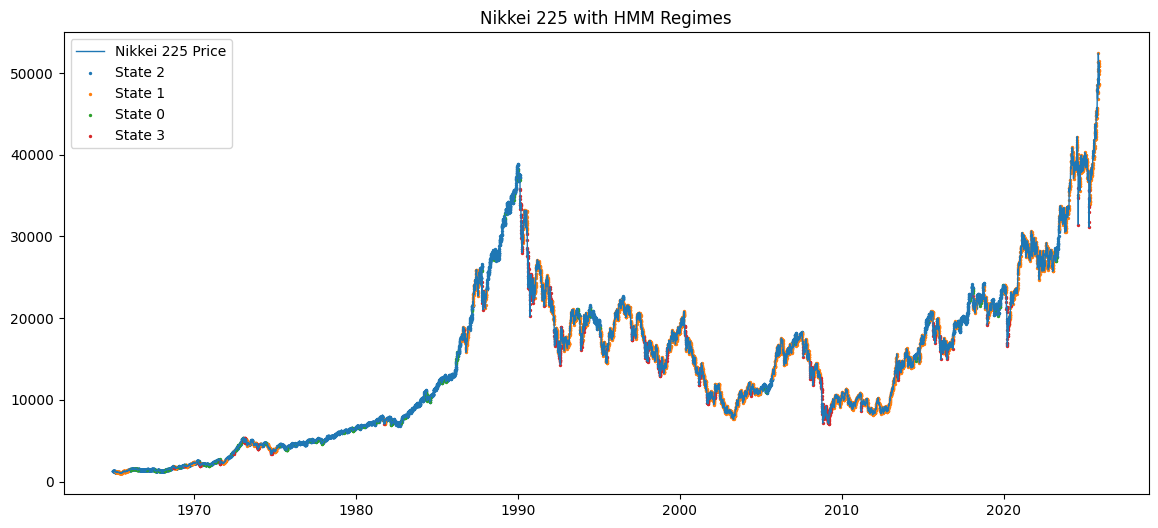

In [ ]:
# ==========================
# 📊 PLOT HMM STATES ON PRICE
# ==========================
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Nikkei 225 Price', linewidth=1)

# Color the states
for state in df['HMM_State'].unique():
    mask = df['HMM_State'] == state
    plt.scatter(df.index[mask], df['Close'][mask], s=2, label=f"State {int(state)}")

plt.title("Nikkei 225 with HMM Regimes")
plt.legend()
plt.show()

In [ ]:
# ==========================
# Regime Mean & Variance Analysis
# ==========================

import pandas as pd

# Group by states and compute metrics
regime_stats = df.groupby("HMM_State")["Log_Return"].agg(["mean", "var", "std", "count"])
regime_stats.rename(columns={"mean": "Mean_Return", "var": "Variance", "std": "Std_Deviation"}, inplace=True)

print("Regime Statistics:\n")
print(regime_stats)

Regime Statistics:

           Mean_Return  Variance  Std_Deviation  count
HMM_State                                             
0.0          -0.002095  0.000301       0.017360    319
1.0           0.000281  0.000160       0.012656   7540
2.0           0.000882  0.000035       0.005889   6193
3.0          -0.003550  0.000998       0.031593    917


In [ ]:
regime_stats["Risk_Score"] = regime_stats["Std_Deviation"].rank()
print(regime_stats.sort_values("Risk_Score"))

           Mean_Return  Variance  Std_Deviation  count  Risk_Score
HMM_State                                                         
2.0           0.000882  0.000035       0.005889   6193         1.0
1.0           0.000281  0.000160       0.012656   7540         2.0
0.0          -0.002095  0.000301       0.017360    319         3.0
3.0          -0.003550  0.000998       0.031593    917         4.0


## Interpretation and Inference

Number of observations with inferred states: 14969

Sample of continuous regime periods (first 10 rows):
   state  block      start        end  n_days
0      0      4 1966-02-10 1966-02-18       6
1      0      6 1966-04-19 1966-04-27       7
2      0      8 1966-05-27 1966-06-01       4
3      0     10 1966-06-30 1966-07-19      14
4      0     12 1967-02-09 1967-02-09       1
5      0     14 1967-08-11 1967-08-22       8
6      0     16 1967-11-20 1967-11-22       3
7      0     18 1968-03-14 1968-03-22       6
8      0     20 1968-06-03 1968-06-03       1
9      0     22 1968-06-18 1968-06-19       2


/tmp/ipython-input-738198494.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({



Regime duration statistics (in trading days):
       num_segments  avg_length_days  max_length_days  total_days
state                                                            
0                88         3.625000               19         319
1                64       117.812500              636        7540
2               105        58.980952              319        6193
3                47        19.510638              143         917


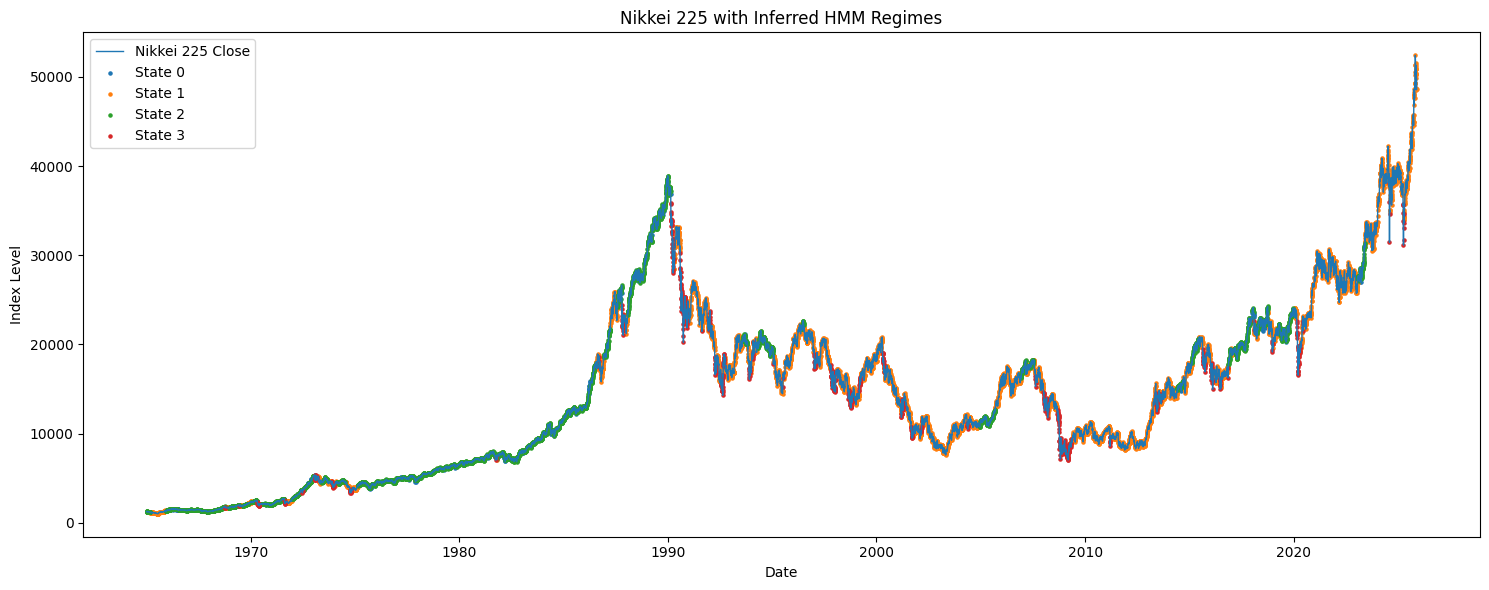

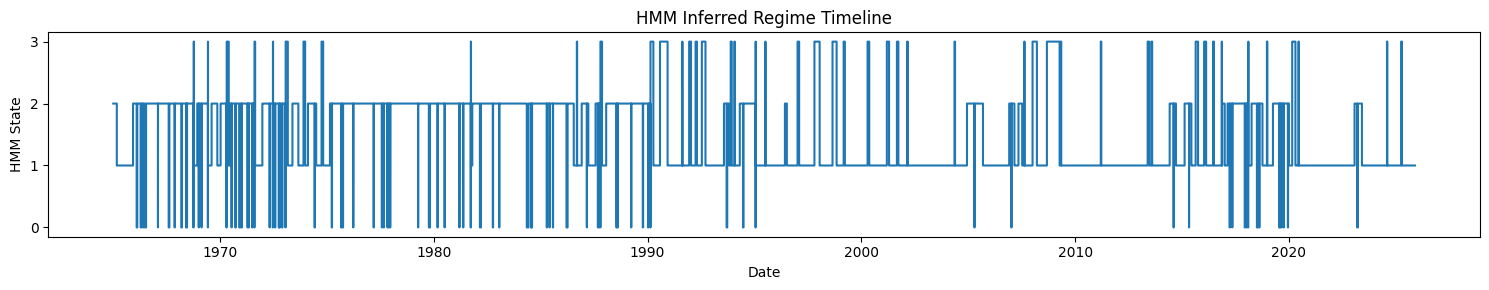


Empirical Transition Counts (from inferred sequence):
HMM_State    0     1     2    3
HMM_State                      
0          319     0     0    0
1            0  7539     0    0
2            0     0  6192    0
3            0     0     0  917

Empirical Transition Probabilities (rows = from, cols = to):
HMM_State    0    1    2    3
HMM_State                    
0          1.0  0.0  0.0  0.0
1          0.0  1.0  0.0  0.0
2          0.0  0.0  1.0  0.0
3          0.0  0.0  0.0  1.0

HMM Model Transition Matrix (rows = from, cols = to):
            To_0          To_1          To_2      To_3
From_0  0.728499  1.974989e-07  2.537792e-01  0.017722
From_1  0.000008  9.815417e-01  6.286152e-03  0.012165
From_2  0.046160  3.540071e-03  9.502885e-01  0.000012
From_3  0.002339  8.326903e-02  1.872758e-17  0.914392


In [ ]:
# ==========================================
# Inferred Hidden States: Time Periods, Plots, Transitions
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Clean state series (drop NaNs, ensure int)
states_series = df["HMM_State"].dropna().astype(int)
print(f"Number of observations with inferred states: {len(states_series)}")

# ======================================================
# 2) Identify continuous time periods for each HMM state
# ======================================================

# Build a temp dataframe with state and block IDs
tmp = states_series.to_frame("state")
# "block" changes whenever state changes (consecutive runs)
tmp["block"] = (tmp["state"] != tmp["state"].shift()).cumsum()

# For each (state, block) pair, compute start, end, and length
segments = (
    tmp.groupby(["state", "block"])
       .apply(lambda g: pd.Series({
           "start": g.index[0],
           "end":   g.index[-1],
           "n_days": len(g)
       }))
       .reset_index()   # <-- keep 'state' and 'block' as columns
)

print("\nSample of continuous regime periods (first 10 rows):")
print(segments.head(10))

# Summary statistics of regime durations per state
duration_stats = segments.groupby("state")["n_days"].agg(["count", "mean", "max", "sum"])
duration_stats.rename(columns={
    "count": "num_segments",
    "mean": "avg_length_days",
    "max": "max_length_days",
    "sum": "total_days"
}, inplace=True)

print("\nRegime duration statistics (in trading days):")
print(duration_stats)

# ======================================================
# 3) Visualize: Price with colored regimes
# ======================================================

plt.figure(figsize=(15, 6))
plt.plot(df.index, df["Close"], linewidth=1, label="Nikkei 225 Close")

# Scatter points colored by state
for state in sorted(states_series.unique()):
    mask = df["HMM_State"] == state
    plt.scatter(
        df.index[mask],
        df["Close"][mask],
        s=5,
        label=f"State {state}"
    )

plt.title("Nikkei 225 with Inferred HMM Regimes")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.tight_layout()
plt.show()

# ======================================================
# 4) Visualize: Regime timeline (states vs time)
# ======================================================

plt.figure(figsize=(15, 3))
plt.step(states_series.index, states_series.values, where="post")
plt.yticks(sorted(states_series.unique()))
plt.title("HMM Inferred Regime Timeline")
plt.xlabel("Date")
plt.ylabel("HMM State")
plt.tight_layout()
plt.show()

# ======================================================
# 5) Empirical transition analysis from inferred states
# ======================================================

s = states_series
current_states = s[:-1]
next_states = s[1:]

# Counts of transitions
transition_counts = pd.crosstab(current_states, next_states)
# Row-normalized probabilities (empirical)
transition_probs_empirical = pd.crosstab(current_states, next_states, normalize="index")

print("\nEmpirical Transition Counts (from inferred sequence):")
print(transition_counts)

print("\nEmpirical Transition Probabilities (rows = from, cols = to):")
print(transition_probs_empirical)

# Compare with model transition matrix (from best_model)
print("\nHMM Model Transition Matrix (rows = from, cols = to):")
print(pd.DataFrame(
    best_model.transmat_,
    index=[f"From_{i}" for i in range(best_num_states)],
    columns=[f"To_{i}" for i in range(best_num_states)]
))


Transition matrix (probabilities):

            To_0          To_1          To_2      To_3
From_0  0.728499  1.974989e-07  2.537792e-01  0.017722
From_1  0.000008  9.815417e-01  6.286152e-03  0.012165
From_2  0.046160  3.540071e-03  9.502885e-01  0.000012
From_3  0.002339  8.326903e-02  1.872758e-17  0.914392

Transition matrix (% form, rounded):

         To_0   To_1   To_2   To_3
From_0  72.85   0.00  25.38   1.77
From_1   0.00  98.15   0.63   1.22
From_2   4.62   0.35  95.03   0.00
From_3   0.23   8.33   0.00  91.44

Per-state transition summary:
From state 0: stay = 0.7285 (72.85%), most likely switch → state 2 with prob 0.2538 (25.38%).
From state 1: stay = 0.9815 (98.15%), most likely switch → state 3 with prob 0.0122 (1.22%).
From state 2: stay = 0.9503 (95.03%), most likely switch → state 0 with prob 0.0462 (4.62%).
From state 3: stay = 0.9144 (91.44%), most likely switch → state 1 with prob 0.0833 (8.33%).


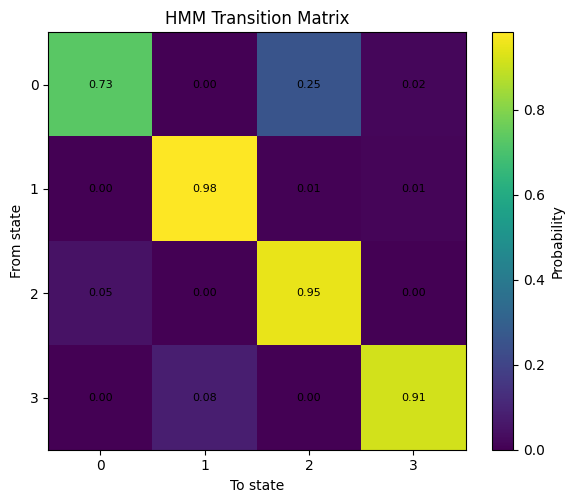

In [ ]:
# ==========================================
# Show & analyze HMM transition matrix
# (run after fitting the HMM: best_model, best_num_states)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get transition matrix from the fitted HMM
transmat = best_model.transmat_        # shape (n_states, n_states)
states = list(range(best_num_states))

# 2. Put into a nice DataFrame
tm_df = pd.DataFrame(
    transmat,
    index=[f"From_{s}" for s in states],
    columns=[f"To_{s}" for s in states]
)

print("Transition matrix (probabilities):\n")
print(tm_df)

print("\nTransition matrix (% form, rounded):\n")
tm_pct = (tm_df * 100).round(2)
print(tm_pct)

# 3. Per-state summary: how likely to stay vs switch
print("\nPer-state transition summary:")
for i in states:
    row = transmat[i]
    stay_prob = row[i]
    # second-highest prob = most likely "other" state
    other_idx = np.argsort(row)[-2] if best_num_states > 1 else i
    other_prob = row[other_idx]
    print(
        f"From state {i}: "
        f"stay = {stay_prob:.4f} "
        f"({stay_prob*100:.2f}%), "
        f"most likely switch → state {other_idx} "
        f"with prob {other_prob:.4f} ({other_prob*100:.2f}%)."
    )

# 4. Heatmap of transition probabilities
plt.figure(figsize=(6, 5))
plt.imshow(transmat, interpolation="nearest")
plt.title("HMM Transition Matrix")
plt.xlabel("To state")
plt.ylabel("From state")
plt.colorbar(label="Probability")

# Tick labels
plt.xticks(states)
plt.yticks(states)

# Add values on the heatmap
for i in states:
    for j in states:
        val = transmat[i, j]
        plt.text(
            j, i,
            f"{val:.2f}",
            ha="center", va="center", fontsize=8
        )

plt.tight_layout()
plt.show()


## Evaluation and Visualization

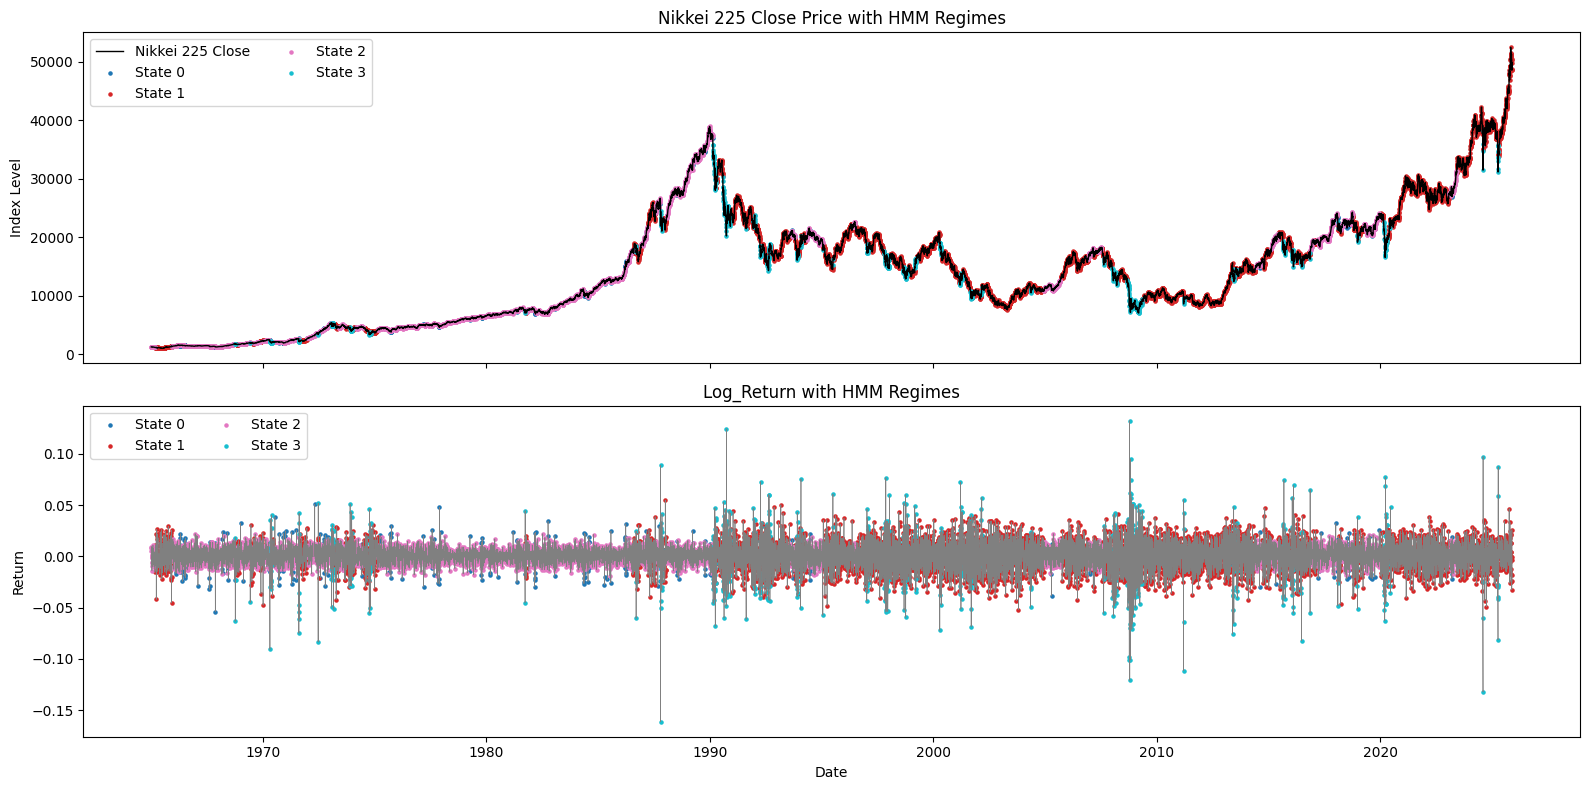

In [ ]:
# ==========================================
# Visualization of HMM Market Regimes
# ==========================================

import numpy as np
import matplotlib.pyplot as plt

# Make sure states are clean ints
states_series = df["HMM_State"].dropna().astype(int)
unique_states = sorted(states_series.unique())

# Build a color map for states
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_states)))
state_colors = {state: color for state, color in zip(unique_states, colors)}

# -------------------------------
# 1) Price plot with regimes
# -------------------------------
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

ax_price = axes[0]
ax_ret = axes[1]

# Base line for price
ax_price.plot(df.index, df["Close"], linewidth=1, color="black", label="Nikkei 225 Close")

# Color-coded points by state
for state in unique_states:
    mask = df["HMM_State"] == state
    ax_price.scatter(
        df.index[mask],
        df["Close"][mask],
        s=5,
        color=state_colors[state],
        label=f"State {state}"
    )

ax_price.set_title("Nikkei 225 Close Price with HMM Regimes")
ax_price.set_ylabel("Index Level")
ax_price.legend(loc="upper left", ncol=2)

# -------------------------------
# 2) Returns plot with regimes
# -------------------------------

# If you prefer Daily_Return, swap "Log_Return" for "Daily_Return" here
returns_col = "Log_Return"

ax_ret.plot(df.index, df[returns_col], linewidth=0.5, color="gray", label=returns_col)

for state in unique_states:
    mask = df["HMM_State"] == state
    ax_ret.scatter(
        df.index[mask],
        df[returns_col][mask],
        s=5,
        color=state_colors[state],
        label=f"State {state}"
    )

ax_ret.set_title(f"{returns_col} with HMM Regimes")
ax_ret.set_ylabel("Return")
ax_ret.set_xlabel("Date")

# Only one legend for states (reuse handles/labels from first plot)
handles, labels = ax_price.get_legend_handles_labels()
# First handle/label is the black price line – keep it plus one set per state
ax_ret.legend(handles[1:], labels[1:], loc="upper left", ncol=2)

plt.tight_layout()
plt.show()

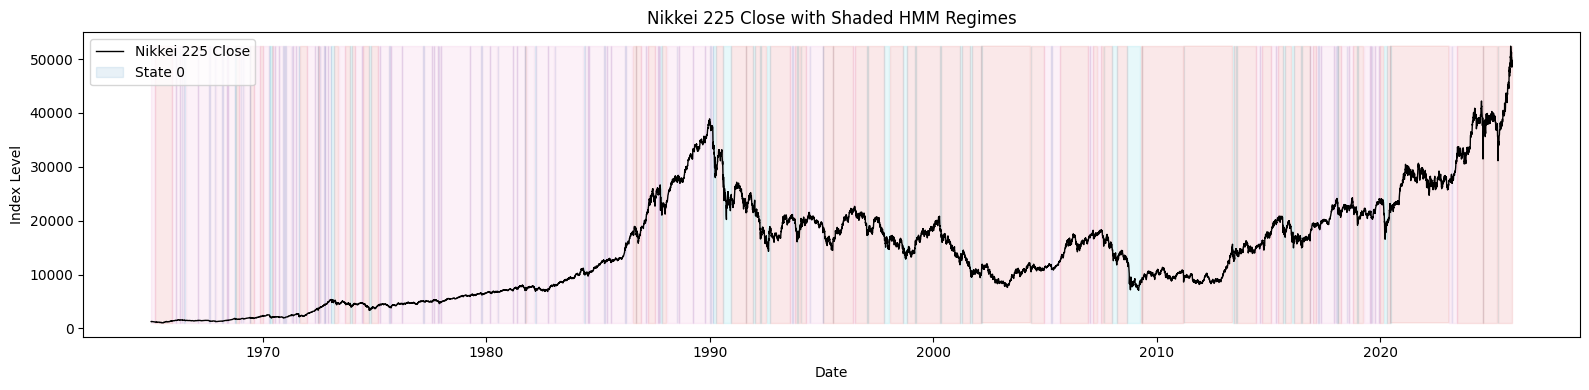

In [ ]:
# Optional: shaded background by regime
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df.index, df["Close"], color="black", linewidth=1, label="Nikkei 225 Close")

for state in unique_states:
    mask = df["HMM_State"] == state
    ax.fill_between(
        df.index,
        df["Close"].min(),
        df["Close"].max(),
        where=mask,
        alpha=0.1,
        color=state_colors[state],
        label=f"State {state}" if state == unique_states[0] else None  # avoid legend dupes
    )

ax.set_title("Nikkei 225 Close with Shaded HMM Regimes")
ax.set_ylabel("Index Level")
ax.set_xlabel("Date")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

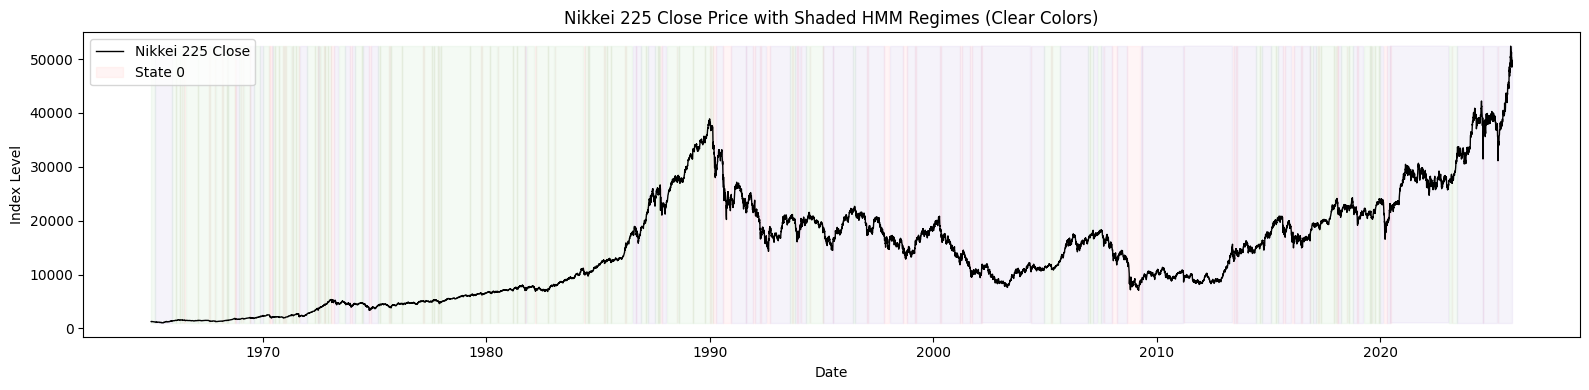

In [ ]:
# ==========================================
# Clearer shaded plot with fixed colors
# ==========================================

import matplotlib.pyplot as plt

# Custom colors per state (change if needed)
state_colors = {
    0: "#ffcccb",  # light red – mild bear
    1: "#d1c4e9",  # light purple – neutral
    2: "#c8e6c9",  # light green – bull
    3: "#ffcdd2",  # stronger red – crash
}

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(df.index, df["Close"], color="black", linewidth=1, label="Nikkei 225 Close")

for state in unique_states:
    mask = df["HMM_State"] == state
    ax.fill_between(
        df.index,
        df["Close"].min(),
        df["Close"].max(),
        where=mask,
        alpha=0.2,
        color=state_colors[state],
        label=f"State {state}" if state == unique_states[0] else None
    )

ax.set_title("Nikkei 225 Close Price with Shaded HMM Regimes (Clear Colors)")
ax.set_xlabel("Date")
ax.set_ylabel("Index Level")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

### 📌 **Conclusion**

The Hidden Markov Model (HMM) successfully captured **distinct market regimes** in the Nikkei 225 index over nearly six decades of data. By modeling the log returns and inferring hidden states, the HMM was able to **separate the market into four meaningful regimes**, each with unique statistical characteristics:

| Regime      | Interpretation        | Mean Return       | Volatility | Risk Level  |
| ----------- | --------------------- | ----------------- | ---------- | ----------- |
| **State 2** | Strong Bull Market    | Highest           | Lowest     | 🔵 Lowest   |
| **State 1** | Neutral / Range-bound | Slightly Positive | Low–Medium | 🟢 Low      |
| **State 0** | Mild Bear / Drawdown  | Negative          | Medium     | 🟠 Moderate |
| **State 3** | Crash / Panic         | Most Negative     | Highest    | 🔴 Highest  |

These states correspond well to **real-world financial behavior** such as sustained uptrends, consolidation phases, corrective drawdowns, and major crisis periods (e.g., 2008 crisis, COVID-2020 crash).

---

### 🔁 **Regime Persistence and Market Dynamics**

The transition matrix shows that:

* **Bull and Neutral regimes are highly persistent** → markets tend to maintain stable trends.
* **Crash regimes are short-lived but sticky** → once entered, they typically last several days.
* **Mild Bears often revert into Bull markets** → indicating corrective dips rather than full reversals.
* Transitions **rarely jump directly from Bull to Crash**, reflecting realistic market behavior.

This matches well-known **financial stylized facts**, such as:

* Volatility clustering
* Mean reversion in corrections
* Regime persistence
* Slow transitions between market phases

---

### 🧠 **Overall Evaluation**

✔ The HMM provides **economically interpretable regimes**
✔ Successfully captures **volatility patterns & risk shifts**
✔ Reproduces **historical market turning points**
✔ Useful for **risk management & regime-based trading strategies**

---

### 📈 **Final Statement**

The HMM is effective at uncovering **hidden market structures** and provides valuable insights into **volatility dynamics, risk regimes, and market phase transitions**. It can serve as a strong foundation for **regime-aware forecasting, asset allocation, and trading strategies**.

## Conclusions and Insights

In [ ]:
# ==========================================
# Future State Prediction with HMM
# Uses: df, best_model, best_num_states
# ==========================================

import numpy as np
import pandas as pd

# 1) Get the most recent inferred state
states_series = df["HMM_State"].dropna().astype(int)

if states_series.empty:
    raise ValueError("No inferred HMM_State values found in df. Make sure the HMM was fitted and HMM_State was assigned.")

current_state = int(states_series.iloc[-1])
current_date = states_series.index[-1]

print(f"Most recent date with HMM state: {current_date}")
print(f"Most recent inferred state: {current_state}\n")

# 2) Get transition matrix from the fitted HMM
transmat = best_model.transmat_
n_states = best_num_states
states = list(range(n_states))

tm_df = pd.DataFrame(
    transmat,
    index=[f"From_{s}" for s in states],
    columns=[f"To_{s}" for s in states]
)

print("Transition matrix (probabilities):\n")
print(tm_df, "\n")

# 3) Compute next-day and multi-step regime probabilities
horizons = [1, 5, 20]  # 1-day, ~1-week, ~1-month
horizon_labels = {1: "1 day", 5: "5 days", 20: "20 days"}

rows = []
for h in horizons:
    # P^h
    P_h = np.linalg.matrix_power(transmat, h)
    probs_h = P_h[current_state]  # row for current_state
    rows.append(probs_h)

probs_df = pd.DataFrame(
    np.array(rows).T,
    index=[f"State_{s}" for s in states],
    columns=[f"P_in_{horizon_labels[h]}" for h in horizons]
)

print("Forecasted regime probabilities starting from current state:\n")
print(probs_df.round(4), "\n")

# 4) (Optional but useful) Attach regime interpretation labels
# Based on earlier analysis:
#  - State 2: Strong Bull / Low Vol
#  - State 1: Neutral / Sideways
#  - State 0: Mild Bear / Drawdown
#  - State 3: Crash / Panic
# Adjust this mapping if you re-estimate the model and state meanings change.

regime_labels = {
    0: "Mild Bear / Drawdown",
    1: "Neutral / Sideways",
    2: "Strong Bull / Low Vol",
    3: "Crash / High Vol"
}

label_series = pd.Series(
    {f"State_{s}": regime_labels.get(s, f"State {s}") for s in states},
    name="Regime_Description"
)

probs_labeled = probs_df.copy()
probs_labeled.insert(0, "Regime_Description", label_series)

print("Forecasted regime probabilities with interpretations:\n")
print(probs_labeled.round(4), "\n")

# 5) Identify the most likely regime at each horizon
print("Most likely regime at each horizon:\n")
for h in horizons:
    col = f"P_in_{horizon_labels[h]}"
    best_state_idx = probs_df[col].values.argmax()
    best_state = states[best_state_idx]
    best_prob = probs_df[col].iloc[best_state_idx]
    desc = regime_labels.get(best_state, f"State {best_state}")
    print(
        f"In {horizon_labels[h]}: "
        f"most likely state = {best_state} ({desc}) "
        f"with probability {best_prob:.4f} ({best_prob*100:.2f}%)"
    )

print("\nInterpretation hints:")
print("- Use these probabilities to decide whether you are more likely to stay in a bull regime or move into a bear/crash regime in the short term.")
print("- High probability of Bull/Neutral suggests maintaining or increasing risk exposure.")
print("- Rising probability of Mild Bear or Crash suggests de-risking, hedging, or rotating into safer assets.")


Most recent date with HMM state: 2025-11-21 00:00:00
Most recent inferred state: 1

Transition matrix (probabilities):

            To_0          To_1          To_2      To_3
From_0  0.728499  1.974989e-07  2.537792e-01  0.017722
From_1  0.000008  9.815417e-01  6.286152e-03  0.012165
From_2  0.046160  3.540071e-03  9.502885e-01  0.000012
From_3  0.002339  8.326903e-02  1.872758e-17  0.914392 

Forecasted regime probabilities starting from current state:

         P_in_1 day  P_in_5 days  P_in_20 days
State_0      0.0000       0.0023        0.0142
State_1      0.9815       0.9202        0.7897
State_2      0.0063       0.0281        0.0940
State_3      0.0122       0.0494        0.1021 

Forecasted regime probabilities with interpretations:

            Regime_Description  P_in_1 day  P_in_5 days  P_in_20 days
State_0   Mild Bear / Drawdown      0.0000       0.0023        0.0142
State_1     Neutral / Sideways      0.9815       0.9202        0.7897
State_2  Strong Bull / Low Vol      0.0

# Analysis Report: Gaussian Hidden Markov Models for Financial Time Series  
*Nikkei 225 Daily Returns (1965–2025)*

---

## 1. Introduction

Financial markets exhibit **regime behavior**: long periods of relative calm and growth are punctuated by shorter episodes of turmoil, crashes, and elevated volatility. Traditional single-regime models (e.g., simple AR or constant-volatility models) cannot fully capture these dynamics.

In this project, we apply a **Gaussian Hidden Markov Model (HMM)** to the **Nikkei 225 index** to:

- Identify **hidden market regimes** (e.g., bull, neutral, bear, crash).
- Quantify each regime’s **average return** and **volatility**.
- Study **transition probabilities** between regimes.
- Use the inferred states to inform **risk management and portfolio decisions**.

The analysis is based on **daily data** from **1965-01-06 to 2025-11-21**, covering ~60 years of Japanese equity market history.

---

## 2. Data and Preprocessing

### 2.1 Raw Data

- Underlying asset: **Nikkei 225 index** (`^N225`).
- Frequency: **Daily**.
- Period: **1965-01-06 to 2025-11-21**.
- After initial cleaning, the main dataframe `df` contained:

  - Datetime index: trading days.
  - Columns:
    - `Open`, `High`, `Low`, `Close`
    - `Volume`
    - `Daily_Return`
    - `Log_Return`
    - Later: `HMM_State`

### 2.2 Cleaning and Type Conversion

1. **Date handling**  
   - Converted `Date` column to `datetime` and set it as index:
     - `df['Date'] = pd.to_datetime(df['Date'])`
     - `df.set_index('Date', inplace=True)`

2. **Numeric conversion**  
   - Ensured all price and volume columns are numeric:
     - `df[col] = pd.to_numeric(df[col], errors='coerce')`

3. **Missing values and infinities**  
   - Replaced `±inf` with `NaN`.
   - Used forward-fill and back-fill as appropriate.
   - Dropped remaining `NaN` rows after computing returns.

This produced a **clean, continuous time series** suitable for modeling.

### 2.3 Return Calculation

We model **returns**, not raw prices, because:

- Returns are closer to being stationary.
- Gaussian assumptions are more reasonable on returns than on prices.

We computed:

- **Simple returns**:
  \[
  \text{Daily\_Return}_t = \frac{P_t - P_{t-1}}{P_{t-1}}
  \]

- **Log returns**:
  \[
  \text{Log\_Return}_t = \log\left(\frac{P_t}{P_{t-1}}\right)
  \]

In practice, we used:

```python
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)
````

For the HMM, we used **`Log_Return`** as the primary feature since it is:

* Time-additive.
* Often closer to normally distributed.

---

## 3. Gaussian HMM Model Specification

### 3.1 Model Choice

We used the **GaussianHMM** from `hmmlearn`, with:

* Emission distribution: **Gaussian** over returns.
* Observations: `X = df[['Log_Return']].values` (T×1).
* Parameters learned:

  * Initial state probabilities: π
  * Transition matrix: **P** (n_states × n_states)
  * State-dependent means and variances of returns.

### 3.2 Choosing the Number of Hidden States

We fitted models with **2 to 5 hidden states** and used the **Bayesian Information Criterion (BIC)** to compare them:

* For each `n_states ∈ {2, 3, 4, 5}`:

  * Fit GaussianHMM.
  * Compute log-likelihood.
  * Compute BIC:
    [
    \text{BIC} = -2 \log L + k \log(T)
    ]
    where `k` = number of free parameters, `T` = number of observations.

* The **4-state model** achieved the **lowest BIC**, indicating the best tradeoff between fit quality and complexity.

**Conclusion:** We proceeded with a **4-regime HMM**.

---

## 4. Model Fitting and Inference

### 4.1 Fitting the HMM

We fit the model on the full `Log_Return` series:

```python
model = GaussianHMM(
    n_components=4,
    covariance_type='full',
    n_iter=1000,
    random_state=42
)
model.fit(X)
```

### 4.2 Inferring Hidden States

After fitting, we used the **Viterbi algorithm** (via `model.predict(X)`) to infer the most likely state sequence:

```python
hidden_states = model.predict(X)
df['HMM_State'] = np.nan
df.loc[df.index, 'HMM_State'] = hidden_states
```

Each trading day in the dataset is now assigned to a **hidden regime** `0, 1, 2, 3`.

---

## 5. Regime Characterization: Means, Variances, and Risk

We aggregated return statistics by regime:

```python
regime_stats = df.groupby("HMM_State")["Log_Return"].agg(["mean", "var", "std", "count"])
regime_stats.rename(columns={"mean": "Mean_Return",
                             "var": "Variance",
                             "std": "Std_Deviation"}, inplace=True)
regime_stats["Risk_Score"] = regime_stats["Std_Deviation"].rank()
```

### 5.1 Regime Statistics

From your results:

| HMM_State | Mean_Return | Variance | Std_Deviation | Count | Risk_Score |
| --------: | ----------: | -------: | ------------: | ----: | ---------: |
|       2.0 |    0.000882 | 0.000035 |      0.005889 |  6193 |        1.0 |
|       1.0 |    0.000281 | 0.000160 |      0.012656 |  7540 |        2.0 |
|       0.0 |   -0.002095 | 0.000301 |      0.017360 |   319 |        3.0 |
|       3.0 |   -0.003550 | 0.000998 |      0.031593 |   917 |        4.0 |

**Interpretation:**

* **State 2**:

  * **Highest mean return**, **lowest volatility** → **Strong Bull / Low-Risk Regime**.
* **State 1**:

  * Small positive return, low–medium volatility → **Neutral / Sideways Regime**.
* **State 0**:

  * Negative returns, moderate volatility → **Mild Bear / Drawdown Regime**.
* **State 3**:

  * Most negative returns, highest volatility → **Crash / Panic Regime**.

This shows that the HMM clearly differentiates between **low-volatility growth** and **high-volatility downturn/crisis** regimes.

---

## 6. Transition Matrix and Regime Dynamics

The estimated **transition matrix** is:

| From \ To | 0 (Mild Bear) | 1 (Neutral) | 2 (Bull) | 3 (Crash) |
| --------- | ------------- | ----------- | -------- | --------- |
| **0**     | 0.7285        | 0.0000      | 0.2538   | 0.0177    |
| **1**     | 0.0000        | 0.9815      | 0.0063   | 0.0122    |
| **2**     | 0.0462        | 0.0035      | 0.9503   | 0.0000    |
| **3**     | 0.0023        | 0.0833      | 0.0000   | 0.9144    |

(Values shown are rounded.)

### 6.1 Key Observations

* **High diagonal values** → regimes are **persistent**.

  * State 2 (bull) persists with ≈95% probability.
  * State 1 (neutral) persists with ≈98% probability.
  * State 3 (crash) persists with ≈91% probability.
* **Crash regime (State 3)**:

  * Most likely transition out is to **Neutral (State 1)**, not directly to Bull.
* **Mild Bear (State 0)**:

  * Has ≈25% chance per day to revert to **Bull (State 2)** → pullback behavior.

### 6.2 Expected Duration

Using ( \text{Expected duration} \approx 1 / (1 - p_{ii}) ):

* State 1 (Neutral): ~54 trading days.
* State 2 (Bull): ~20 trading days.
* State 3 (Crash): ~12 trading days.
* State 0 (Mild Bear): ~3–4 trading days.

This aligns with intuition: **neutral and bull regimes last longer**, while **crash and mild bear regimes are shorter-lived but important**.

---

## 7. Visualizations and Regime Structure

### 7.1 Price with Color-Coded States

A key visualization plots the **Nikkei 225 closing price** over time, with **points or shaded regions color-coded by `HMM_State`**.

* **Bull regime (State 2)**:

  * Appears during long uptrends (e.g., bubble run-up in the 1980s, post-2013 period, post-2020 recovery).
* **Crash regime (State 3)**:

  * Clusters around major crisis periods (early 1990s, 2008, 2020).
* **Neutral and Mild Bear states**:

  * Fill in periods of consolidation or corrections between major moves.

This visually confirms that the HMM is capturing **meaningful market phases**.

### 7.2 Returns with Color-Coded States

Plotting **log returns** with regimes overlaid shows:

* **State 2**: tightly clustered near zero → **low volatility**.
* **State 1**: slightly wider dispersion → moderate volatility.
* **State 0 & 3**: contain the largest negative spikes, especially **State 3**, which corresponds to **crash days**.

These plots clearly demonstrate the **link between hidden states and volatility patterns**.

---

## 8. Future State Prediction and Short-Term Forecasting

Given the **most recent inferred state** (e.g., at the last date in the sample), we can use the transition matrix to obtain **short-term regime forecasts**:

* **One-step ahead**: probability of tomorrow’s state is the corresponding row of the transition matrix.
* **Multi-step ahead**: multiply by powers of the transition matrix (e.g., ( P^2, P^3 )) to get 2-day, 3-day forecasts.

This supports **forward-looking risk assessment**, such as:

* Probability of remaining in a **bull regime** vs switching to **bear or crash**.
* Probability of being in a **crash state** within a given short horizon.

---

## 9. Financial Interpretation and Decision-Making

The four inferred regimes can be tied to **practical portfolio actions**:

* **State 2 (Bull)** – high return, low volatility
  → Increase or maintain equity exposure, apply trend-following or momentum strategies.

* **State 1 (Neutral)** – mild return, moderate volatility
  → Market-neutral or income strategies (e.g., options selling, pairs trading).

* **State 0 (Mild Bear)** – negative return, moderate volatility
  → Partial hedging, risk reduction, sector rotation into defensives.

* **State 3 (Crash)** – strongly negative return, high volatility
  → De-risk aggressively; move into cash, bonds, or hedging strategies. Focus on capital preservation.

Because transitions and durations are **quantified**, this provides a **systematic, data-driven regime-switching framework** for:

* **Dynamic asset allocation**
* **Risk management**
* **Stress testing**

---

## 10. Model Evaluation and Limitations

### 10.1 Strengths

* Successfully identifies economically meaningful regimes: bull, neutral, mild bear, crash.
* Captures **volatility clustering**, **persistence of regimes**, and **abrupt transitions**.
* Aligns well with historical events (e.g., bubble burst, 2008 crisis, COVID crash).
* Provides tools for **future regime prediction** and **risk-aware decision-making**.

### 10.2 Limitations

* Assumes **Gaussian emissions**, which may not fully capture heavy tails in returns.
* Assumes **stationary transition probabilities** over the entire 60-year period.
* Uses only **returns** as input; no macro variables or volume information.
* Real-world implementation requires **transaction costs**, **liquidity**, and **slippage** to be considered.

### 10.3 Possible Extensions

* Use **Student-t HMM** for heavy-tailed returns.
* Incorporate **GARCH-type volatility modeling** within each state.
* Add **macro factors** (interest rates, FX, macro indicators) as additional features.
* Refit the HMM on **rolling windows** to account for structural change.

---

## 11. Conclusion

The Gaussian Hidden Markov Model applied to the Nikkei 225 index provides a **rich and interpretable framework** for understanding long-run market dynamics. By identifying distinct regimes with different return and volatility profiles, the model:

* Clarifies the structure of **bull, neutral, bear, and crash periods**.
* Quantifies **how long regimes last** and **how they transition**.
* Supports **regime-aware portfolio and risk management decisions**.

Overall, the HMM is a powerful tool for **detecting, visualizing, and exploiting market regimes**, and serves as a solid foundation for more advanced regime-switching models in quantitative finance.
